#Importing the libraries


In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')


#Read the Dataset


In [63]:
snc_df = pd.read_csv(r"/content/school_and_country_table.csv")
#times = pd.read_csv(r"/content/timesData.csv")
#cwur = pd.read_csv(r"/content/cwurData.csv")
#shan = pd.read_csv(r"/content/shanghaiData.csv")

In [64]:
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [65]:
snc_df.shape

(818, 2)

In [66]:
#times.head()

In [67]:
#times.shape

In [68]:
#shan.head()

In [69]:
cwur = pd.read_csv("/content/cwurData.csv")

In [70]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [71]:
cwur.shape

(2200, 14)

In [72]:
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [73]:
np.sum(cwur.isnull())


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [74]:
cwur["broad_impact"].fillna(cwur["broad_impact"].median(),inplace=True)

#Handling null Values

In [75]:
np.sum(cwur.isnull())

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

#Handling Categorical Values



In [76]:
datTypeSeries = cwur.dtypes
print("Data type of each column of timesData Dataframe :")
print(datTypeSeries)

Data type of each column of timesData Dataframe :
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
cwur["institution"]=le.fit_transform(cwur["institution"])
cwur["country"]=le.fit_transform(cwur["country"])

In [79]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,184,54,1,7,9,1,1,1,1,496.0,5,100.00,2012
1,2,312,54,2,9,17,3,12,4,4,496.0,1,91.67,2012
2,3,511,54,3,17,11,5,4,2,2,496.0,15,89.50,2012
3,4,637,57,1,10,24,4,16,16,11,496.0,50,86.17,2012
4,5,53,54,4,2,29,7,37,22,22,496.0,18,85.21,2012


#Handling outliers

In [80]:
def fun(col):
  sns.boxplot(x=col,data=cwur)
  plt.show()

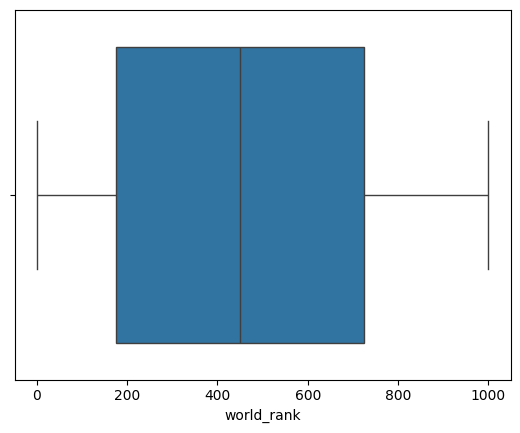

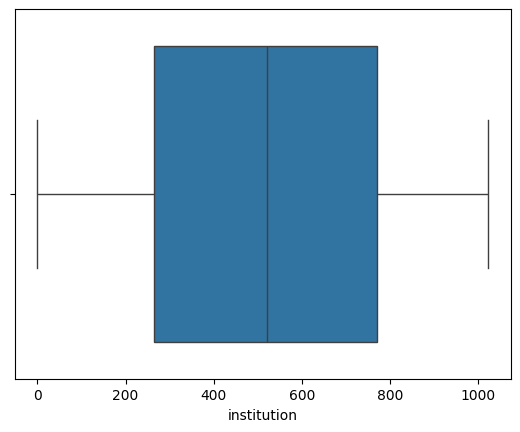

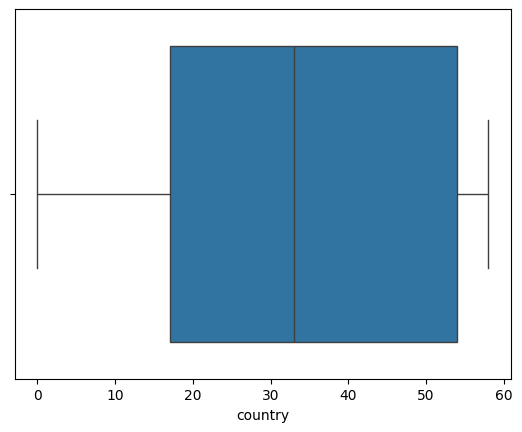

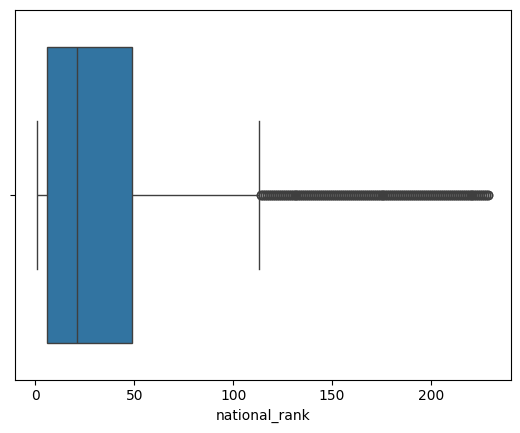

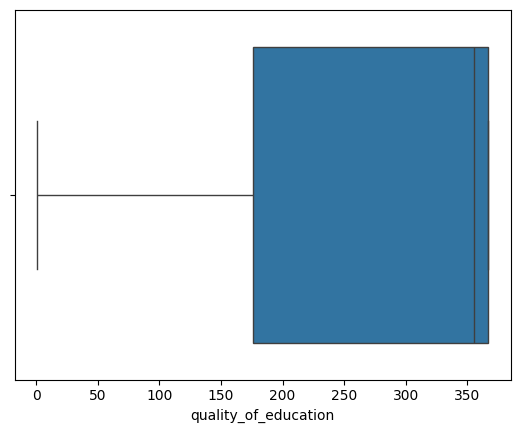

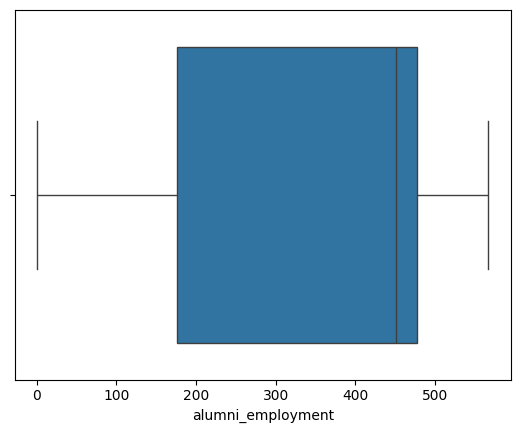

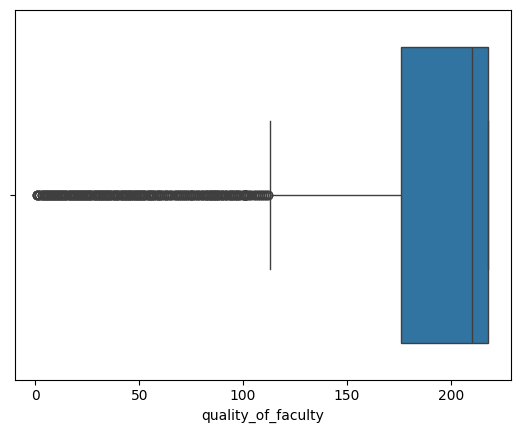

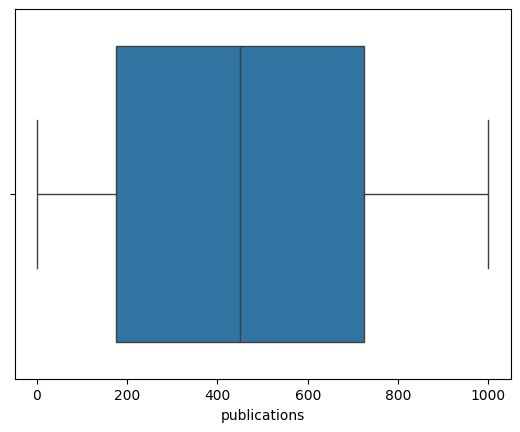

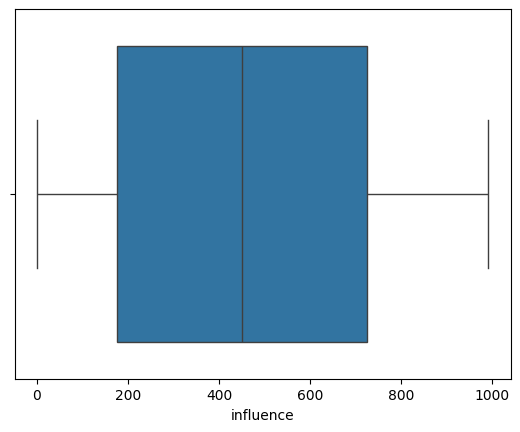

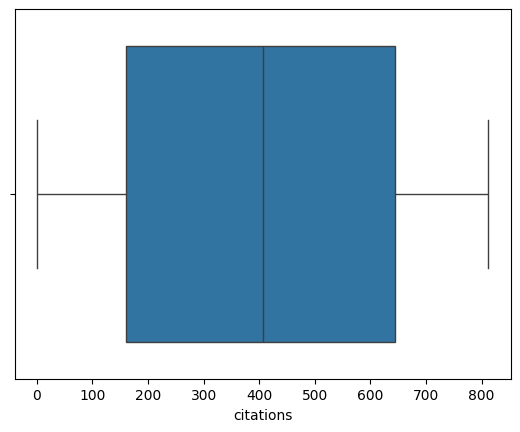

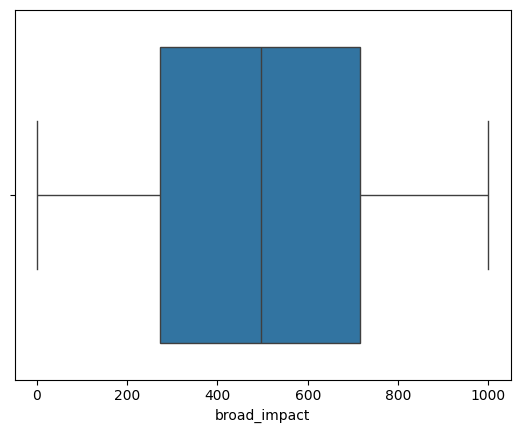

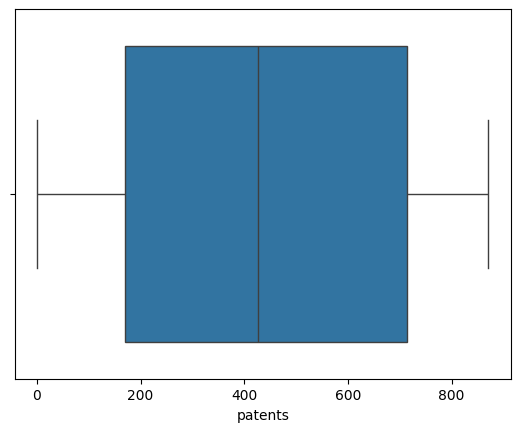

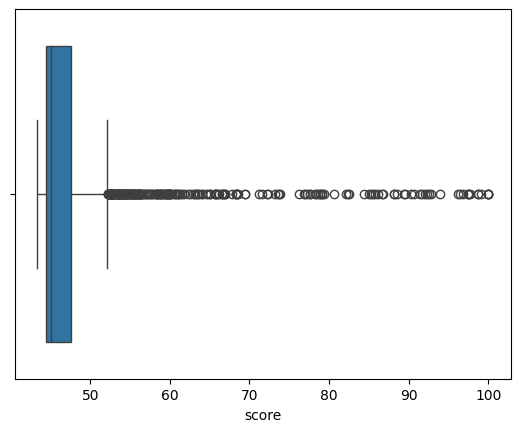

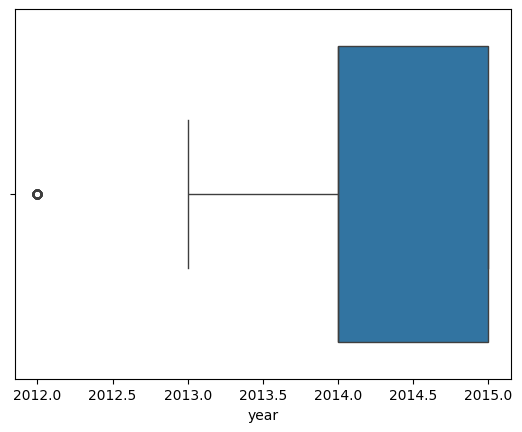

In [81]:
for i in cwur.columns:
  fun(i)

In [82]:

# Iterate over each column
for column in cwur.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(cwur[column]):
        # Calculate quantiles
        quant = cwur[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with values within the bounds
        cwur[column] = np.where(cwur[column] < lower_bound, lower_bound,cwur[column])
        cwur[column] = np.where(cwur[column] > upper_bound, upper_bound, cwur[column])

# Now all outliers in the specified columns have been replaced with values within the IQR bounds



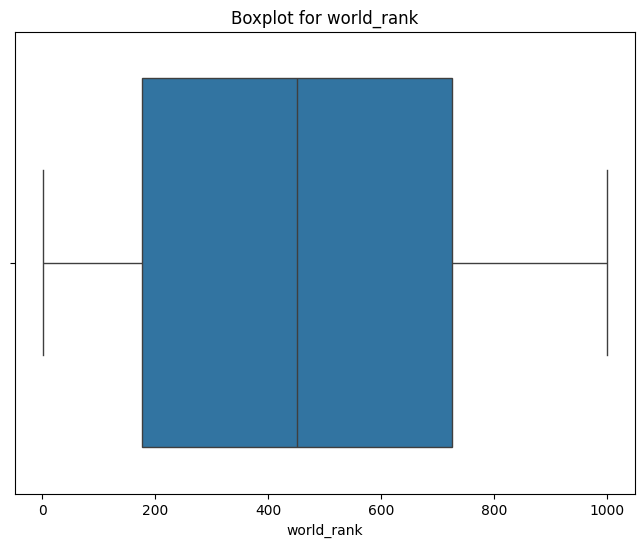

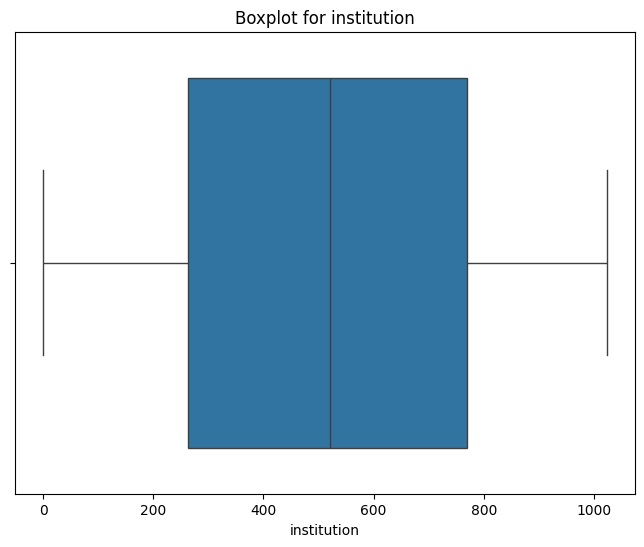

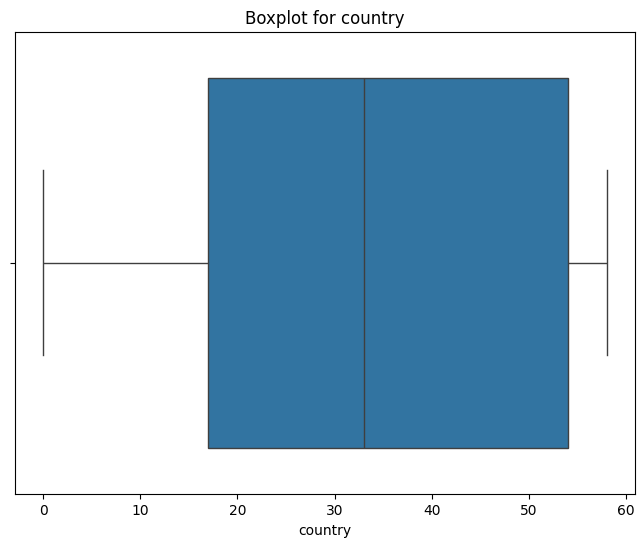

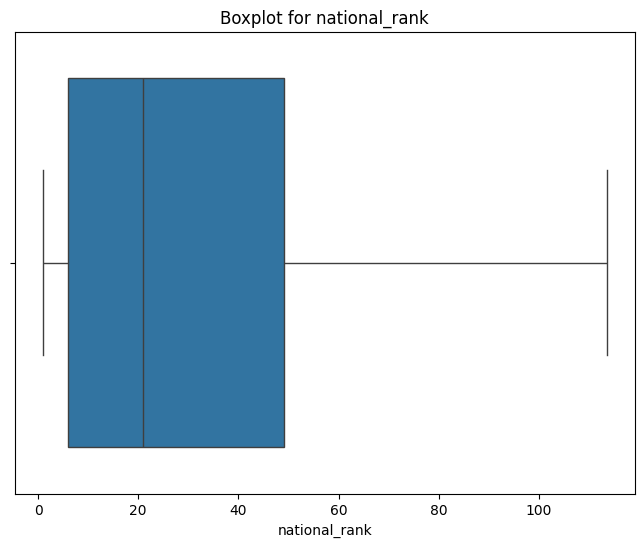

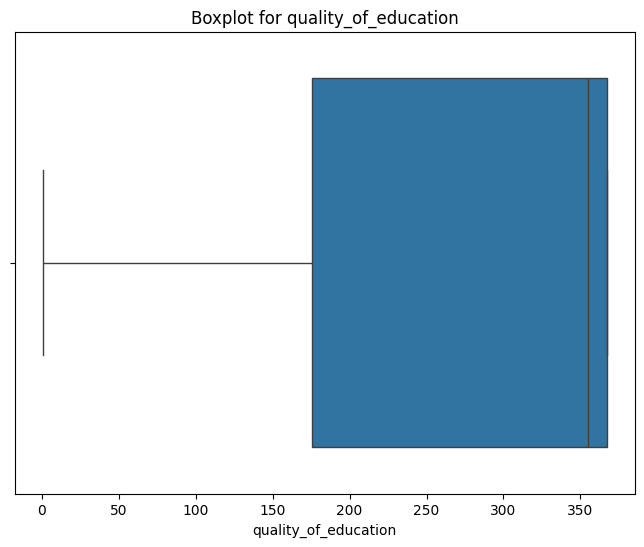

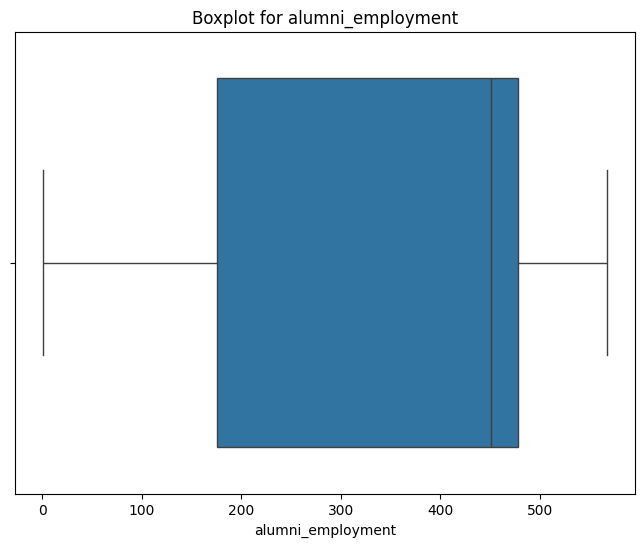

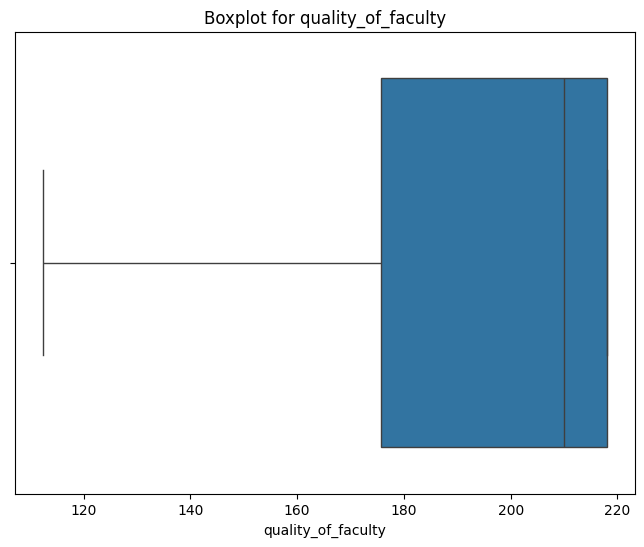

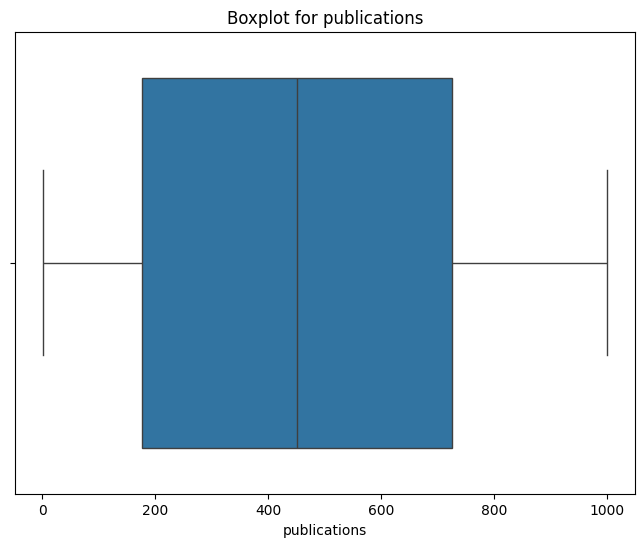

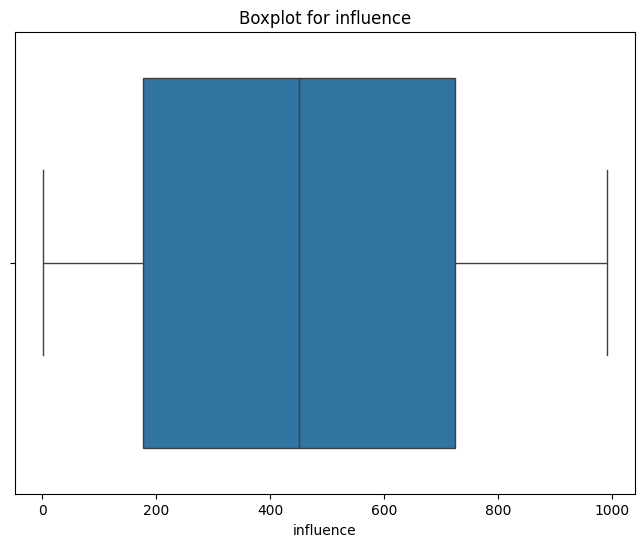

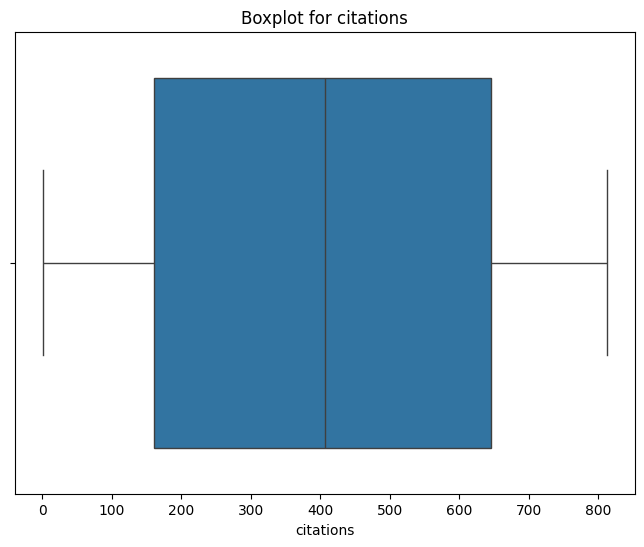

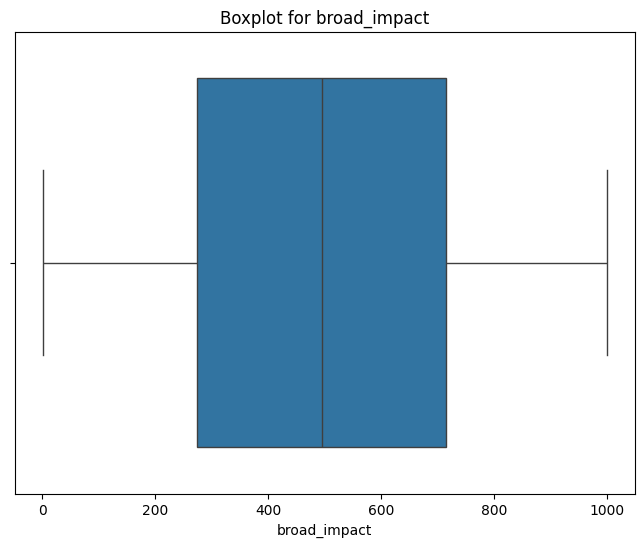

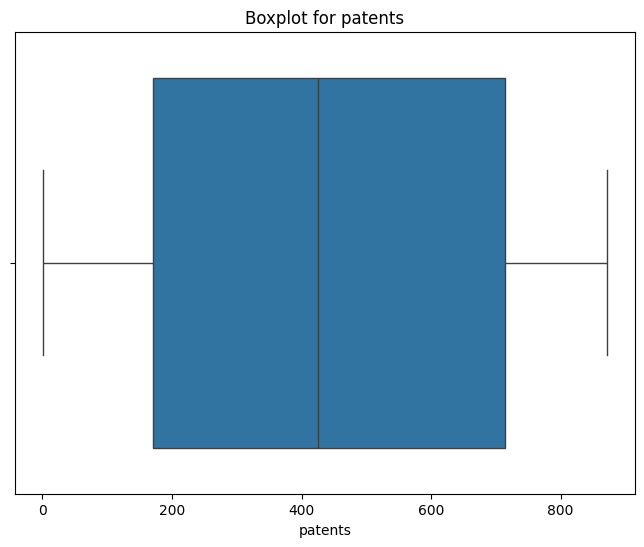

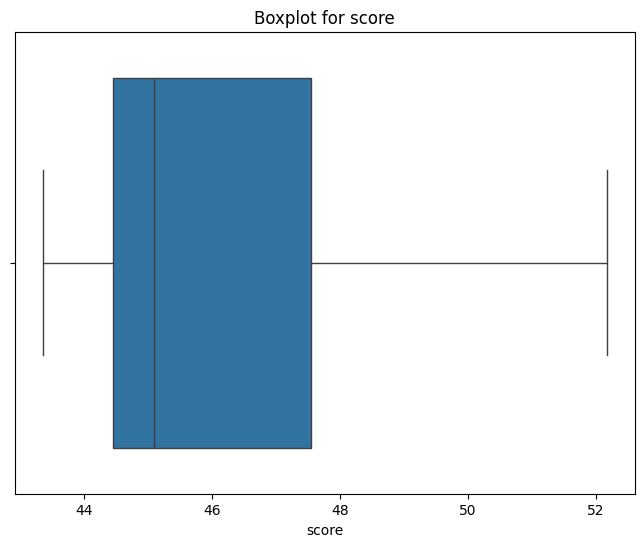

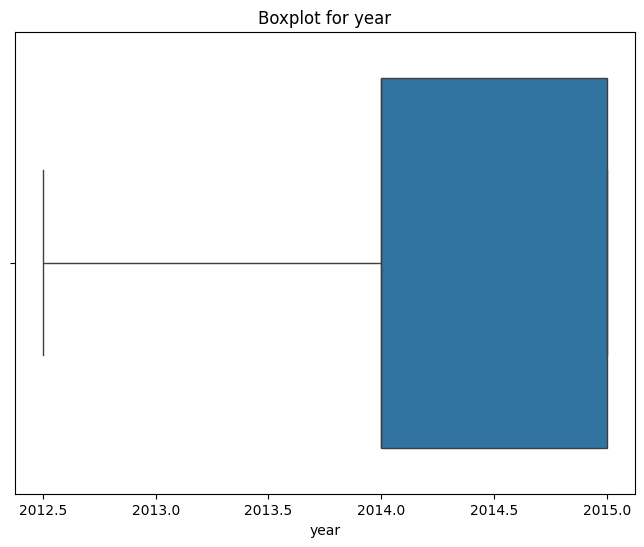

In [83]:
# Iterate over each column and plot boxplot
for column in cwur.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=cwur[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [84]:
cwur.shape

(2200, 14)

#Descriptive Statistical

In [85]:
cwur.describe(include = "all")

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,516.390909,34.110455,34.161818,275.100455,357.116818,189.660000,459.908636,459.797727,413.417273,496.635909,433.346364,46.396089,2014.340909
std,304.320363,294.908607,19.211020,35.642332,121.935100,186.779252,41.673073,303.760352,303.331822,264.366549,273.561106,273.996525,2.674666,0.697334
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,112.375000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.500000
25%,175.750000,263.750000,17.000000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000
50%,450.500000,521.000000,33.000000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,770.250000,54.000000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,1023.000000,58.000000,113.500000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,52.172500,2015.000000


#Visual Analysis

Univariate Analysis

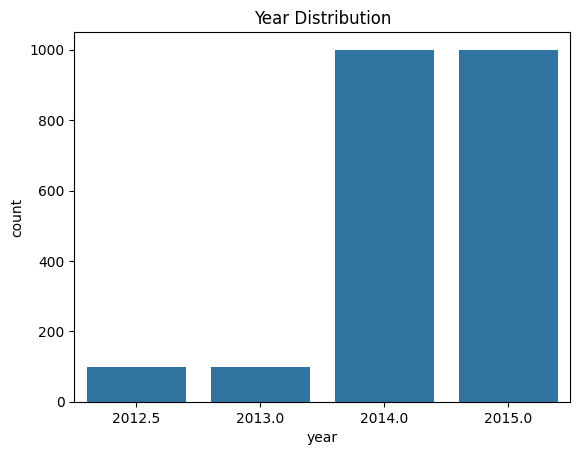

In [86]:
sns.countplot(x='year', data=cwur)
plt.title('Year Distribution')
plt.show()

In [87]:
#mostschools=snc_df.groupby('country').school_name.count().sort_values(ascending=False).head()
#YPoints = np.array(mostschools)
#XPoints = np.array(mostschools.index)

#plt.figure(figsize = (10,6))

#sns.barplot(x = XPoints, y = YPoints)
##sns.set_style("darkgrid")

##plt.xlabel("school Nmae")
#plt.ylabel("Number of school")
#plt.title("Countries with most number of schools")
#plt.show

Bivariate Analysis

In [88]:
Top10 = cwur.head(10)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

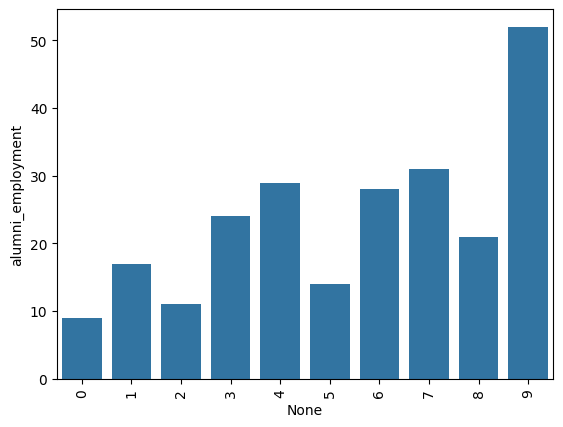

In [89]:
sns.barplot(x = Top10.index,y = 'alumni_employment',data = Top10).set_xticklabels(labels = Top10.index,rotation = 90)

Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

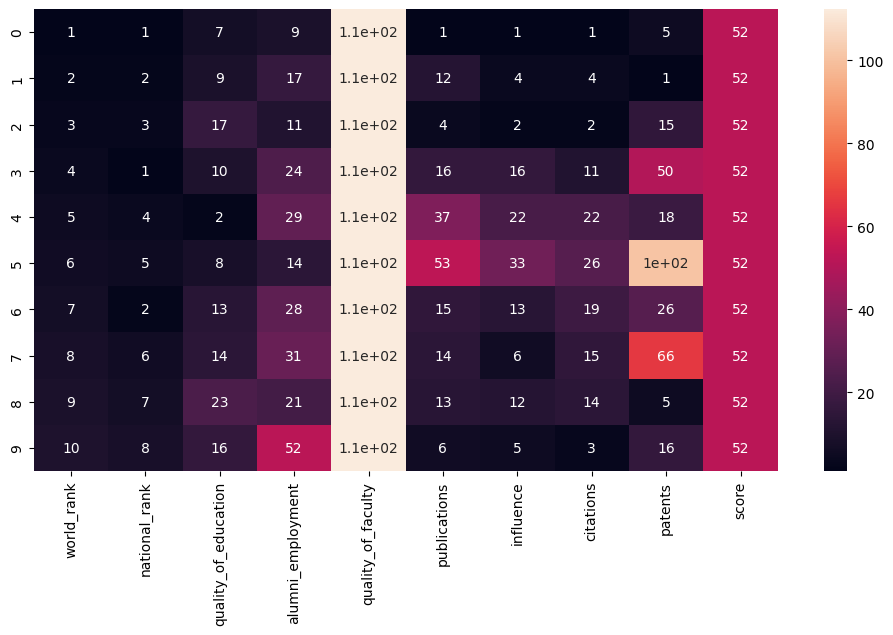

In [90]:
topi = cwur.head(10)
#topi.info()
topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment','quality_of_faculty','publications','influence','citations','patents','score']]
plt.figure(figsize = (12,6))
sns.heatmap(data = topi_f,annot = True)
plt.show

#Splitting data into train and test

In [91]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1.0,184.0,54.0,1.0,7.0,9.0,112.375,1.0,1.0,1.0,496.0,5.0,52.1725,2012.5
1,2.0,312.0,54.0,2.0,9.0,17.0,112.375,12.0,4.0,4.0,496.0,1.0,52.1725,2012.5
2,3.0,511.0,54.0,3.0,17.0,11.0,112.375,4.0,2.0,2.0,496.0,15.0,52.1725,2012.5
3,4.0,637.0,57.0,1.0,10.0,24.0,112.375,16.0,16.0,11.0,496.0,50.0,52.1725,2012.5
4,5.0,53.0,54.0,4.0,2.0,29.0,112.375,37.0,22.0,22.0,496.0,18.0,52.1725,2012.5


In [92]:
x = cwur.drop('score',axis=1)
y = cwur['score']

In [93]:
print(x)

      world_rank  institution  country  national_rank  quality_of_education  \
0            1.0        184.0     54.0            1.0                   7.0   
1            2.0        312.0     54.0            2.0                   9.0   
2            3.0        511.0     54.0            3.0                  17.0   
3            4.0        637.0     57.0            1.0                  10.0   
4            5.0         53.0     54.0            4.0                   2.0   
...          ...          ...      ...            ...                   ...   
2195       996.0        954.0     37.0            7.0                 367.0   
2196       997.0         11.0     14.0            4.0                 236.0   
2197       998.0        132.0      4.0           18.0                 367.0   
2198       999.0        576.0     48.0           40.0                 367.0   
2199      1000.0         74.0      8.0           83.0                 367.0   

      alumni_employment  quality_of_faculty  public

In [94]:
print(y)

0       52.1725
1       52.1725
2       52.1725
3       52.1725
4       52.1725
         ...   
2195    44.0300
2196    44.0300
2197    44.0300
2198    44.0200
2199    44.0200
Name: score, Length: 2200, dtype: float64


In [95]:
x.shape

(2200, 13)

In [96]:
y.shape

(2200,)

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 , random_state=42)

#Training The Model In Multiple Algorithms


Linear Regression model

In [98]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)


LinearRegression()

In [99]:
y_pred = linReg.predict(x_test)

In [100]:
accuracy = linReg.score(x_test,y_test)
print(accuracy)

0.7439493774592185


Lasso Regression model

In [101]:
lassoReg = linear_model.Lasso(alpha = 0.1)
lassoReg.fit(x,y)


Lasso(alpha=0.1)

In [102]:
y_pred = lassoReg.predict(x_test)

In [103]:
accuracy = lassoReg.score(x_test,y_test)
print(accuracy)

0.7444199332854502


SVM Model:

In [104]:
svr = SVR().fit(x,y)


In [105]:

y_pred = svr.predict(x_test)


In [106]:
accuracy = svr.score(x_test,y_test)
print(accuracy)

0.8223608225568596


Decision Tree Model:

In [107]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x,y)


DecisionTreeRegressor(random_state=0)

In [108]:
y_pred = dt.predict(x_test)

In [109]:
accuracy = dt.score(x_test,y_test)
print(accuracy)

1.0


Random Forest Model:

In [110]:
rf = RandomForestRegressor(n_estimators = 100 , random_state = 0)
rf.fit(x,y)


RandomForestRegressor(random_state=0)

In [111]:
y_pred = rf.predict(x_test)

In [112]:
accuracy = rf.score(x_test,y_test)
print(accuracy)

0.9998704251212489


#Testing The Model

In [113]:
cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1.0,184.0,54.0,1.0,7.0,9.0,112.375,1.0,1.0,1.0,496.0,5.0,52.1725,2012.5
1,2.0,312.0,54.0,2.0,9.0,17.0,112.375,12.0,4.0,4.0,496.0,1.0,52.1725,2012.5
2,3.0,511.0,54.0,3.0,17.0,11.0,112.375,4.0,2.0,2.0,496.0,15.0,52.1725,2012.5
3,4.0,637.0,57.0,1.0,10.0,24.0,112.375,16.0,16.0,11.0,496.0,50.0,52.1725,2012.5
4,5.0,53.0,54.0,4.0,2.0,29.0,112.375,37.0,22.0,22.0,496.0,18.0,52.1725,2012.5


In [114]:
cwur.tail()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996.0,954.0,37.0,7.0,367.0,567.0,218.0,926.0,845.0,812.0,969.0,816.0,44.03,2015.0
2196,997.0,11.0,14.0,4.0,236.0,566.0,218.0,997.0,908.0,645.0,981.0,871.0,44.03,2015.0
2197,998.0,132.0,4.0,18.0,367.0,549.0,218.0,830.0,823.0,812.0,975.0,824.0,44.03,2015.0
2198,999.0,576.0,48.0,40.0,367.0,567.0,218.0,886.0,974.0,812.0,975.0,651.0,44.02,2015.0
2199,1000.0,74.0,8.0,83.0,367.0,567.0,218.0,861.0,991.0,812.0,981.0,547.0,44.02,2015.0


In [115]:
dt.predict([[1.0,	184.0,	54.0,	1.0,	7.0,	9.0,	112.375,	1.0	,1.0,	1.0,496.0,5.0,2012.5]])

array([52.1725])

In [116]:
dt.predict([[996.0,954.0,37.0,7.0,367.0,567.0	,218.0,926.0,845.0,812.0,969.0,816.0,2015.0]])

array([44.03])

#Testing Model With Multiple Evaluation Metrics

Compare the Model

In [117]:
# Assuming 'x_test' is available in the environment and is a pandas DataFrame or a NumPy array.
y_pred = linReg.predict(x_test)  # Predict on the entire x_test dataset

print("Prediction Evaluation using Linear Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Linear Regression
Mean Absolute Error: 0.9264657671450711
Mean Squared Error: 1.7890643253785259
Root Mean Squared Error: 1.337559092294066
R-squared: 0.7439493774592185


In [118]:

y_pred = lassoReg.predict(x_test)
print("Prediction Evaluation using lasso Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using lasso Regression
Mean Absolute Error: 0.9352851280381133
Mean Squared Error: 1.7857764808364731
Root Mean Squared Error: 1.3363294806433303
R-squared: 0.7444199332854502


In [119]:

y_pred = svr.predict(x_test)
print("Prediction Evaluation using  support vector Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using  support vector Regression
Mean Absolute Error: 0.5454340693726399
Mean Squared Error: 1.2411917299771091
Root Mean Squared Error: 1.1140878466158355
R-squared: 0.8223608225568596


In [120]:
y_pred = dt.predict(x_test)
print("Prediction Evaluation using Decision Regression ")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Decision Regression 
Mean Absolute Error: 5.264475724040743e-15
Mean Squared Error: 2.7561365735867205e-28
Root Mean Squared Error: 1.6601616106833456e-14
R-squared: 1.0


In [121]:
y_pred = rf.predict(x_test)
print("Prediction Evaluation using Random Regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Prediction Evaluation using Random Regression
Mean Absolute Error: 0.010686590909099649
Mean Squared Error: 0.0009053592244319952
Root Mean Squared Error: 0.0300891878327082
R-squared: 0.9998704251212489


In [122]:
import pickle
pickle.dump(rf,open('usp.pkl','wb'))